# Projeto Airbnb Rio

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
import warnings

Removendo os avisos para melhorar a leitura do notebook.

In [2]:
warnings.filterwarnings('ignore')

## Importanto o Dataset

In [3]:
base_path = pathlib.Path("dataset")
airbnb_base = pd.DataFrame()

mounths = {
    "jan": 1,
    "fev": 2,
    "mar": 3,
    "abr": 4,
    "mai": 5,
    "jun": 6,
    "jul": 7,
    "ago": 8,
    "set": 9,
    "out": 10,
    "nov": 11,
    "dez": 12,
}

for file in base_path.iterdir():
    mounth_name = file.name[:3]
    month = mounths[mounth_name]
    year_name = file.name[-8:]
    year = int(year_name.replace(".csv", "")) 
    airbnb_base = pd.concat([airbnb_base, pd.read_csv(file)], ignore_index=True)    
    airbnb_base["year"] = year
    airbnb_base["month"] = month
airbnb_base

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,year,month
0,17878,https://www.airbnb.com/rooms/17878,20191019132944,2019-10-20,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for Carni...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for Carni...,none,This is the best spot in Rio. Everything happe...,...,strict_14_with_grace_period,f,f,1,1.0,0.0,0.0,2.13,2018,11
1,25026,https://www.airbnb.com/rooms/25026,20191019132944,2019-10-19,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,strict_14_with_grace_period,t,t,3,3.0,0.0,0.0,2.06,2018,11
2,31560,https://www.airbnb.com/rooms/31560,20191019132944,2019-10-20,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,strict_14_with_grace_period,f,f,1,1.0,0.0,0.0,2.36,2018,11
3,35636,https://www.airbnb.com/rooms/35636,20191019132944,2019-10-20,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,"The location is extremely convenient, safe and...",This cosy apartment is just a few steps away ...,none,The apartment street is very quiet and safe ....,...,strict_14_with_grace_period,t,t,1,1.0,0.0,0.0,2.26,2018,11
4,35764,https://www.airbnb.com/rooms/35764,20191019132944,2019-10-19,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,"FEEL LIKE YOUR HOME LIVING AS ""CARIOCA"" LOCAL ...",Our newly renovated studio is located in the b...,none,Our guests will experience living with a local...,...,strict_14_with_grace_period,f,t,1,1.0,0.0,0.0,2.83,2018,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,30040997,https://www.airbnb.com/rooms/30040997,20181115100742,2018-11-15,Zona Sul na Paz - Sovaco de Cristo,"É um apartamento pequeno, reformado de forma s...",NaN,"É um apartamento pequeno, reformado de forma s...",none,NaN,...,flexible,f,f,1,NaN,NaN,NaN,NaN,2018,11
902206,30041929,https://www.airbnb.com/rooms/30041929,20181115100742,2018-11-15,Casa com 4 quartos em condomínio com Piscina,Casa grande com 4 quartos em condomínio de lux...,NaN,Casa grande com 4 quartos em condomínio de lux...,none,NaN,...,flexible,f,f,1,NaN,NaN,NaN,NaN,2018,11
902207,30042037,https://www.airbnb.com/rooms/30042037,20181115100742,2018-11-15,Single Bedroom -with Auxiliary Bed- in Tijuca,"Comfortable apartment, strategically located i...","Apartment located on the third floor, with: El...","Comfortable apartment, strategically located i...",none,The zone surrounding the apartment has a highl...,...,flexible,f,f,2,NaN,NaN,NaN,NaN,2018,11
902208,30042464,https://www.airbnb.com/rooms/30042464,20181115100742,2018-11-15,Copacabana - 100m from the beach!,We are newly wed and are now renting out our n...,First room: has all you need. Second room: is ...,We are newly wed and are now renting out our n...,none,"amazing! Walking distance to the beach, metro ...",...,flexible,f,f,1,NaN,NaN,NaN,NaN,2018,11


In [4]:
for collumn in airbnb_base.columns:
    print(collumn)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

**Foi feita uma alteração para que exista uma coluna de mês e uma coluna de ano.**

## Entendendo as colunas do Dataset

In [5]:
airbnb_base.head(1000).to_csv("airbnb_base_1000.csv", index=False, sep=";")

Estas são as colunas que julguei interessante manter em uma primeira visualização, agora, irei analisar um pouco mais para ver se realmente elas precisam estar aqui.

In [6]:
collumns = [
    "host_response_time",
    "host_response_rate",
    "host_is_superhost",
    "host_listings_count",
    "latitude",
    "longitude",
    "property_type",
    "room_type",
    "accommodates",
    "bathrooms",
    "bedrooms",
    "beds",
    "bed_type",
    "amenities",
    "price",
    "security_deposit",
    "cleaning_fee",
    "guests_included",
    "extra_people",
    "minimum_nights",
    "maximum_nights",
    "number_of_reviews",
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
    "instant_bookable",
    "is_business_travel_ready",
    "cancellation_policy",
    "year",
    "month",
]

In [7]:
airbnb_base = airbnb_base.loc[:, collumns]
display(airbnb_base)

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,year,month
0,within an hour,100%,t,2.0,-22.965920,-43.178960,Condominium,Entire home/apt,5,1.0,...,10.0,10.0,10.0,10.0,9.0,t,f,strict_14_with_grace_period,2018,11
1,within a day,100%,f,3.0,-22.977120,-43.190450,Apartment,Entire home/apt,2,1.0,...,10.0,9.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2018,11
2,within an hour,100%,t,1.0,-22.983020,-43.214270,Apartment,Entire home/apt,3,1.0,...,10.0,10.0,10.0,10.0,10.0,t,f,strict_14_with_grace_period,2018,11
3,within a few hours,100%,t,1.0,-22.988160,-43.193590,Apartment,Entire home/apt,3,1.5,...,9.0,10.0,10.0,10.0,9.0,f,f,strict_14_with_grace_period,2018,11
4,within an hour,100%,t,1.0,-22.981270,-43.190460,Loft,Entire home/apt,2,1.0,...,10.0,10.0,10.0,10.0,10.0,f,f,strict_14_with_grace_period,2018,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,within a day,50%,f,1.0,-22.961213,-43.223335,Apartment,Private room,2,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2018,11
902206,NaN,NaN,f,1.0,-23.000335,-43.418198,House,Entire home/apt,11,4.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2018,11
902207,NaN,NaN,f,2.0,-22.917032,-43.212499,Apartment,Private room,2,1.0,...,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2018,11
902208,within an hour,100%,f,1.0,-22.968013,-43.183911,Apartment,Entire home/apt,5,1.0,...,NaN,NaN,NaN,NaN,NaN,t,f,flexible,2018,11


In [8]:
airbnb_base.isnull().sum()

host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_listings_count               460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
amenities                           0
price                               0
security_deposit               421280
cleaning_fee                   313506
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating           448016
review_scores_accuracy         448586
review_scores_cleanliness      448413
review_scores_checkin          448650
review_score

In [9]:
for collumns in airbnb_base:
    if airbnb_base[collumns].isnull().sum() > 300_000:
        airbnb_base.drop(collumns, axis=1, inplace=True)

display(airbnb_base.isnull().sum())     

host_is_superhost            460
host_listings_count          460
latitude                       0
longitude                      0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                   1724
bedrooms                     850
beds                        2502
bed_type                       0
amenities                      0
price                          0
guests_included                0
extra_people                   0
minimum_nights                 0
maximum_nights                 0
number_of_reviews              0
instant_bookable               0
is_business_travel_ready       0
cancellation_policy            0
year                           0
month                          0
dtype: int64

In [10]:
airbnb_base.dropna(axis=0, inplace=True)

display(airbnb_base.isnull().sum())

host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
year                        0
month                       0
dtype: int64

In [11]:
airbnb_base.shape

(897709, 23)

In [12]:
print(airbnb_base.dtypes)
print("-"*100)
print(airbnb_base.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
year                          int64
month                         int64
dtype: object
----------------------------------------------------------------------------------------------------
host_is_superhost                                        

In [13]:
# Price
airbnb_base['price'] = airbnb_base['price'].str.replace('$', '')
airbnb_base['price'] = airbnb_base['price'].str.replace(',', '')
airbnb_base['price'] = airbnb_base['price'].astype(np.float32) 

#extra people
airbnb_base['extra_people'] = airbnb_base['extra_people'].str.replace('$', '')
airbnb_base['extra_people'] = airbnb_base['extra_people'].str.replace(',', '')
airbnb_base['extra_people'] = airbnb_base['extra_people'].astype(np.float32)


In [14]:
airbnb_base.dtypes

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
year                          int64
month                         int64
dtype: object

### Alteração de Float64 para Float 32

A alteração foi feita pois não precisamos mais do que 7 casas de precisão, além disso, float32 utiliza a metade do espaço em memória comparado a float64.

In [15]:
airbnb_base['host_listings_count'] = airbnb_base['host_listings_count'].astype(np.int32)
airbnb_base['latitude'] = airbnb_base['latitude'].astype(np.float32)
airbnb_base['longitude'] = airbnb_base['longitude'].astype(np.float32)
airbnb_base['bathrooms'] = airbnb_base['bathrooms'].astype(np.float32)
airbnb_base['bedrooms'] = airbnb_base['bedrooms'].astype(np.float32)
airbnb_base['beds'] = airbnb_base['beds'].astype(np.float32)
airbnb_base.dtypes

host_is_superhost            object
host_listings_count           int32
latitude                    float32
longitude                   float32
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float32
bedrooms                    float32
beds                        float32
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
year                          int64
month                         int64
dtype: object

In [16]:
airbnb_base[['year', 'month']]

,year,month
0,2018,11
1,2018,11
2,2018,11
3,2018,11
4,2018,11
...,...,...
902205,2018,11
902206,2018,11
902207,2018,11
902208,2018,11


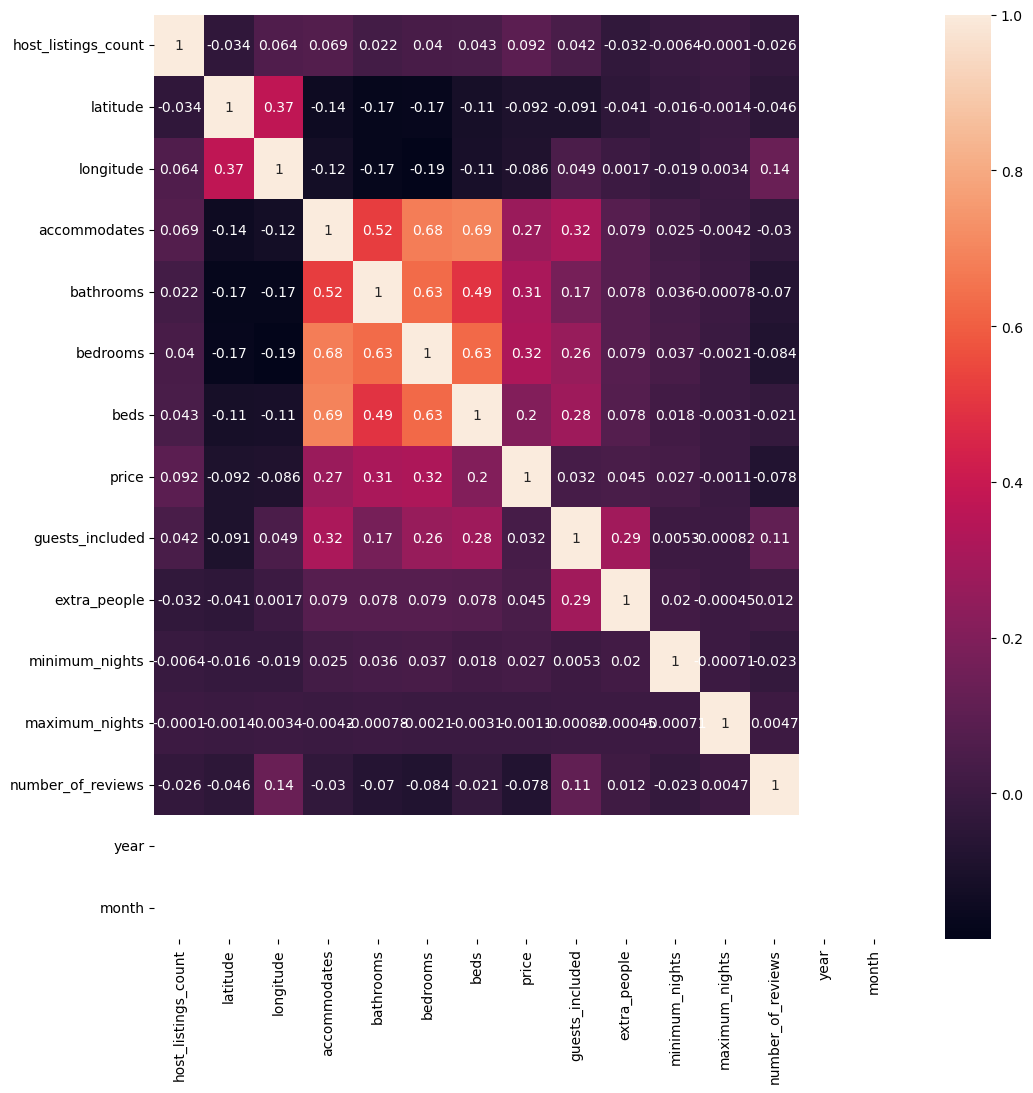

In [17]:
plt.figure(figsize=(12, 12))
sns.heatmap(airbnb_base.corr(numeric_only=True), annot=True)
plt.show()

In [18]:
def limit(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    limit = iqr * 1.5
    lower = q1 - limit
    upper = q3 + limit
    return lower, upper

def exc_outliers(df, collumn):
    lines = df.shape[0]
    lower, upper = limit(df[collumn])
    df = df.loc[(df[collumn] >= lower) & (df[collumn] <= upper), :]
    removed_lines = lines - df.shape[0]
    return df, removed_lines

def box_plot(column):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    sns.boxplot(x=column, ax=ax1)
    ax2.set_xlim(limit(column))
    sns.boxplot(x=column, ax=ax2)
    
def hist_plot(column):
    plt.figure(figsize=(15, 5))
    sns.distplot(column, hist = True)    

def bar_plot(column):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=column.value_counts().index, y=column.value_counts())
    ax.set_xlim(limit(column))



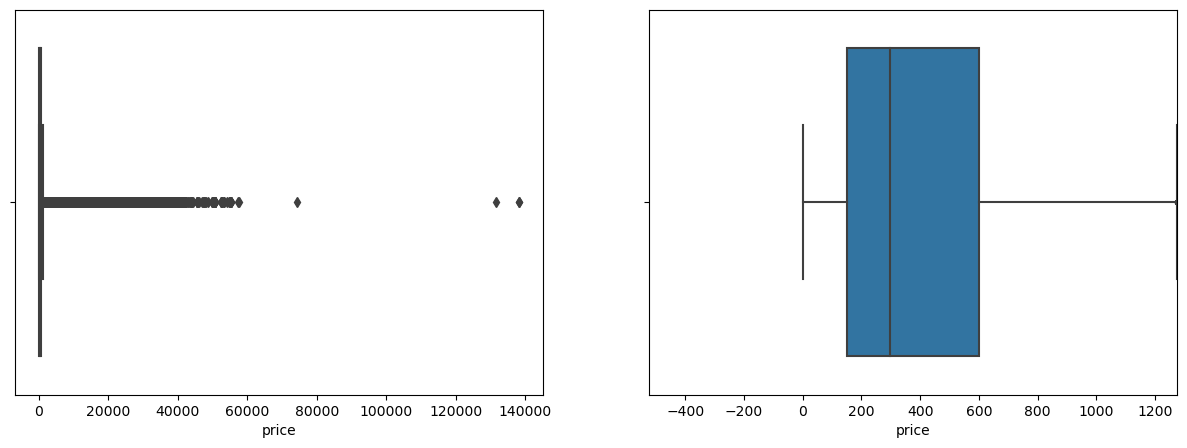

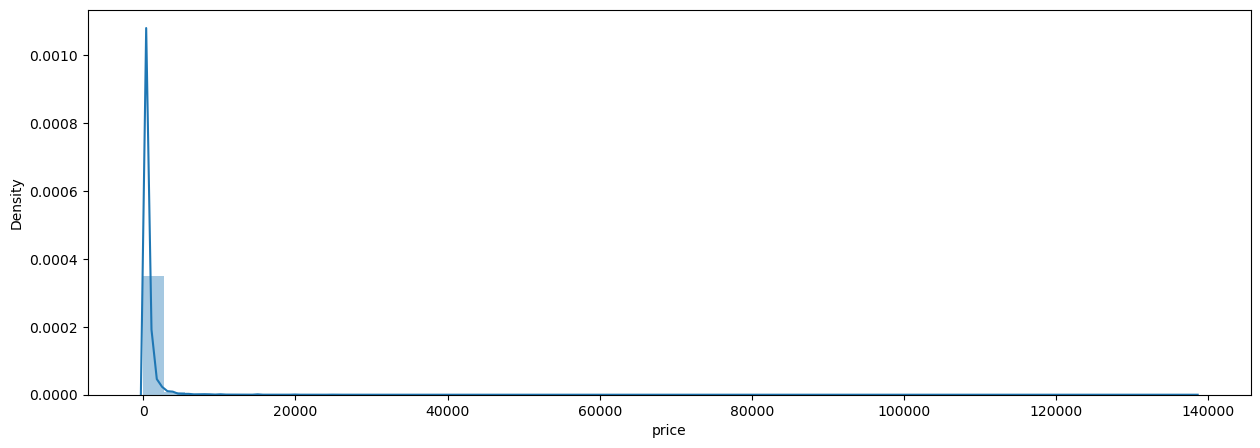

In [19]:
box_plot(airbnb_base['price'])
hist_plot(airbnb_base['price'])

In [20]:
airbnb_base, removed_lines = exc_outliers(airbnb_base, 'price')

print(removed_lines)
print(airbnb_base.shape)

87282
(810427, 23)


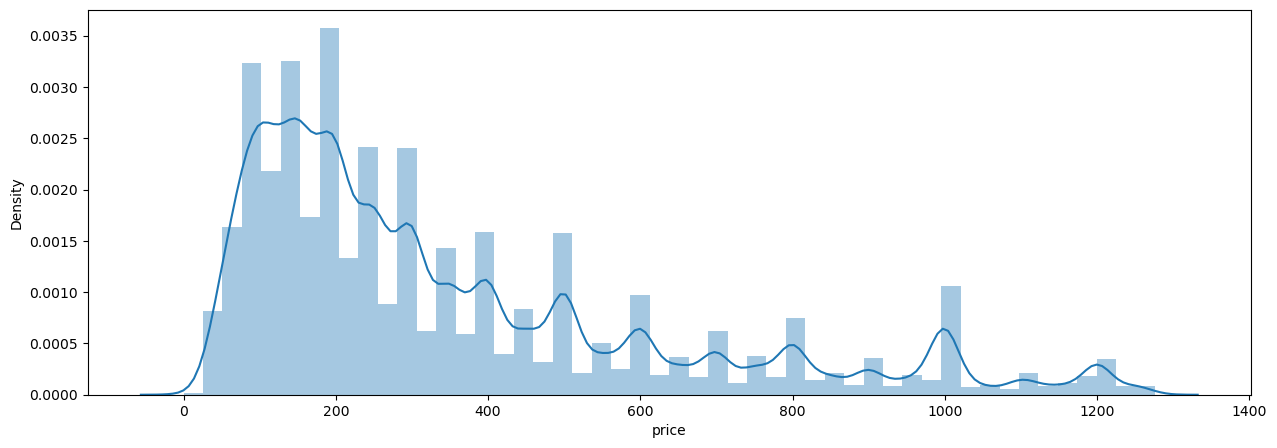

In [21]:
hist_plot(airbnb_base['price'])

### extra peolple

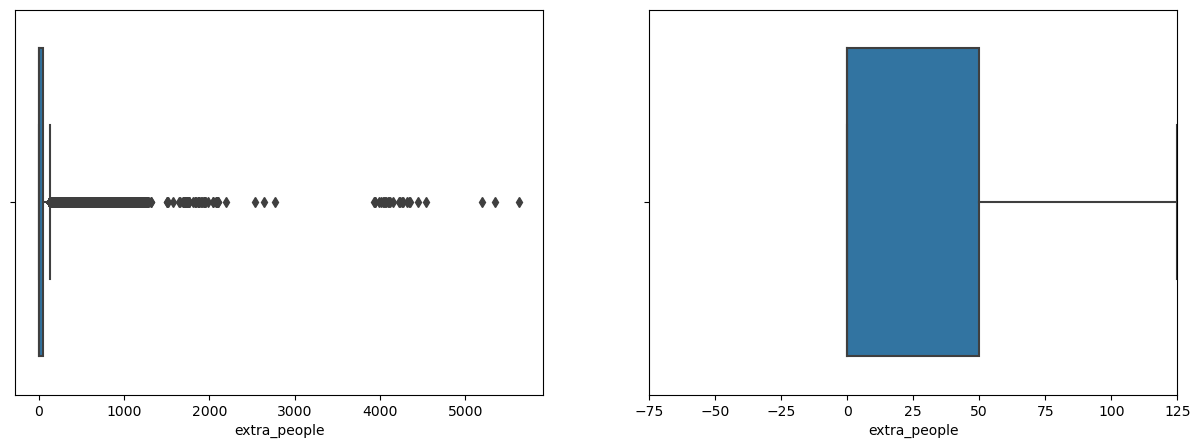

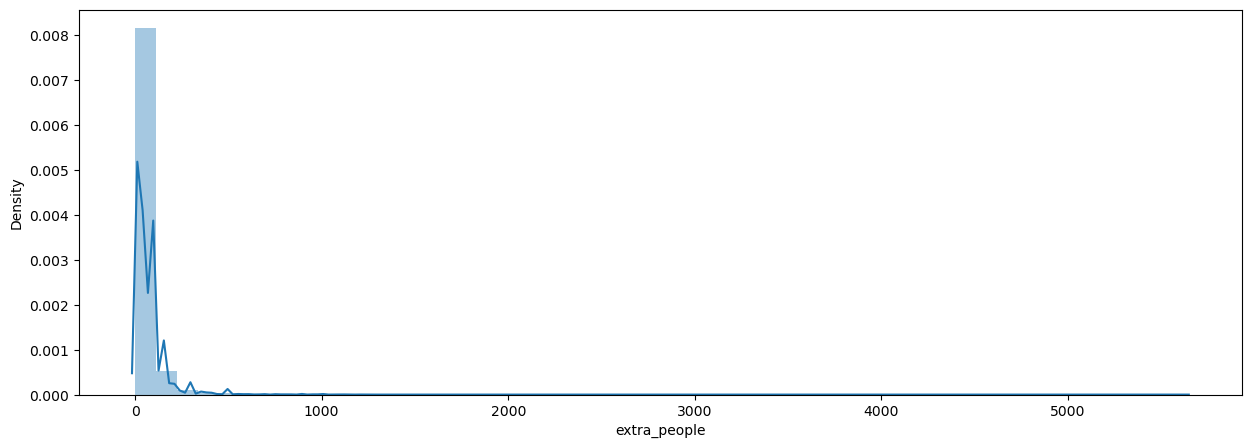

In [22]:
box_plot(airbnb_base['extra_people'])
hist_plot(airbnb_base['extra_people'])

In [23]:
airbnb_base, removed_lines = exc_outliers(airbnb_base, 'extra_people')

print(removed_lines)
print(airbnb_base.shape)

59194
(751233, 23)


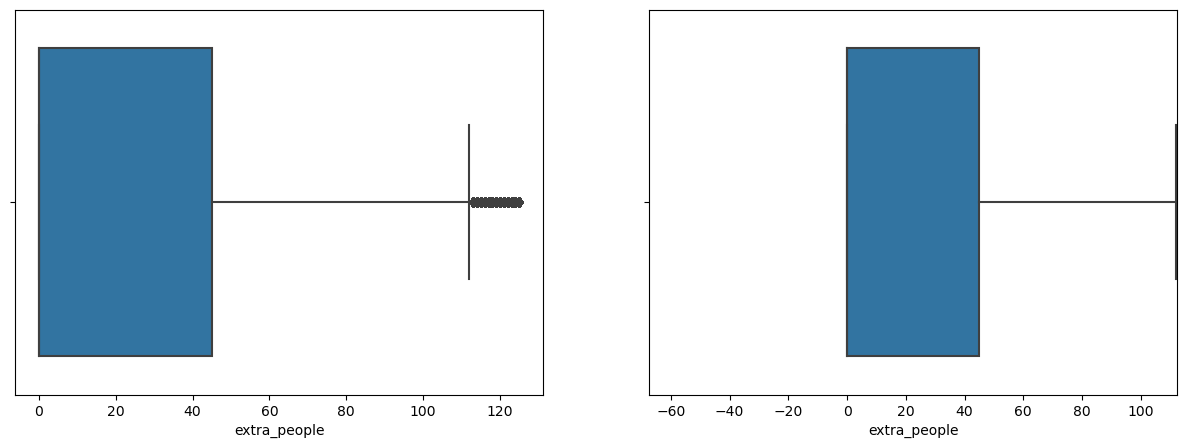

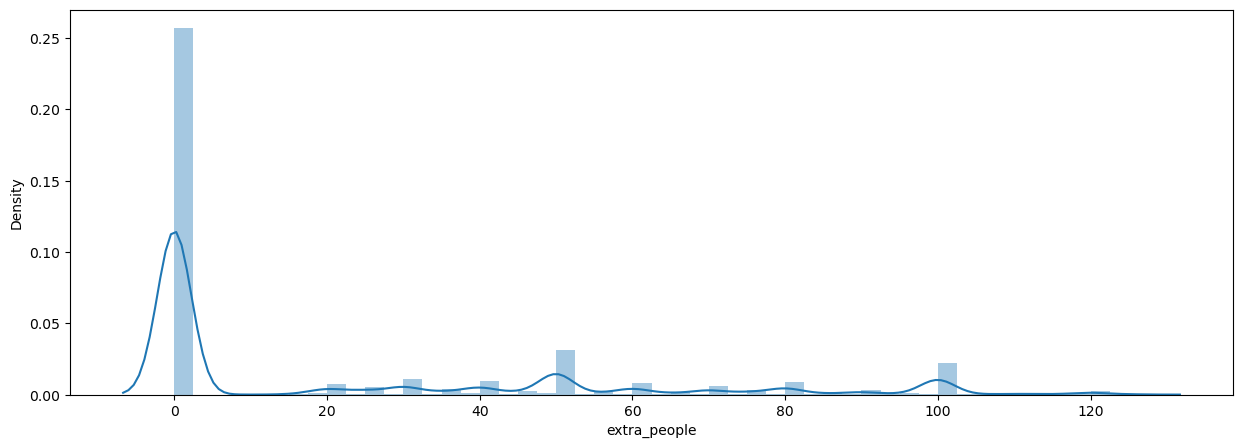

In [24]:
box_plot(airbnb_base['extra_people'])
hist_plot(airbnb_base['extra_people'])

host_listings_count         
accommodates                  
bathrooms                  
bedrooms                 
beds                        
guests_included               
minimum_nights              
maximum_nights                
number_of_reviews             

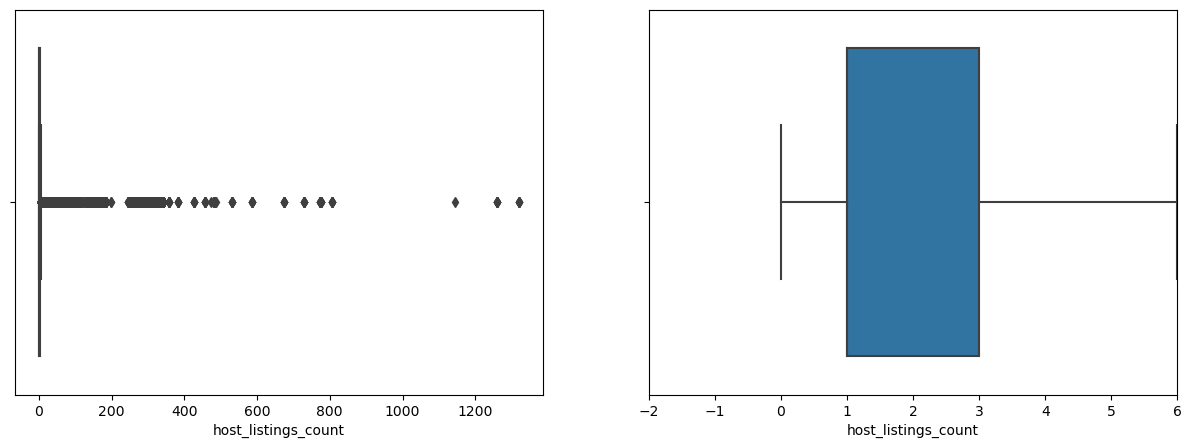

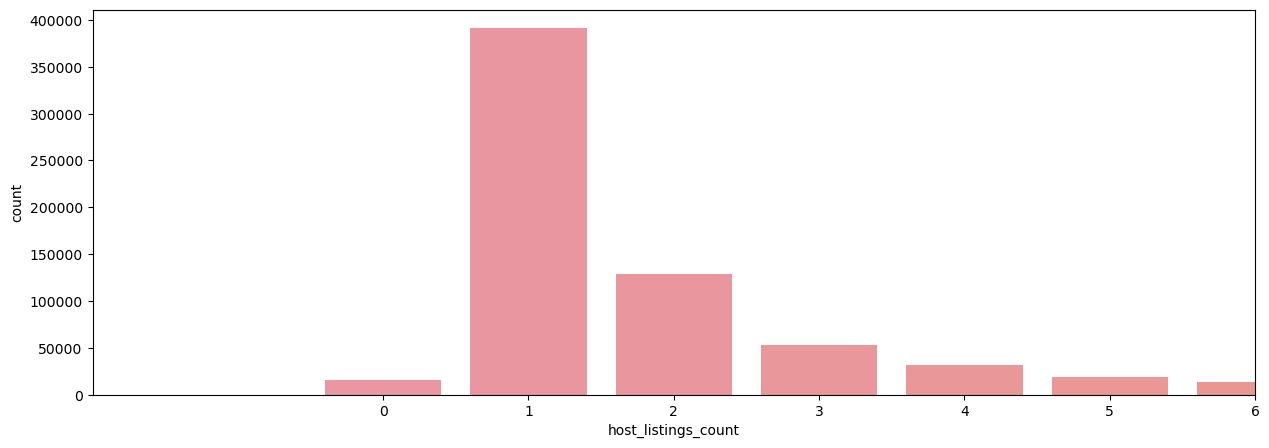

In [25]:
box_plot(airbnb_base['host_listings_count'])
bar_plot(airbnb_base['host_listings_count'])

In [26]:
airbnb_base, removed_lines = exc_outliers(airbnb_base, 'host_listings_count')

print(removed_lines)
print(airbnb_base.shape)

97723
(653510, 23)


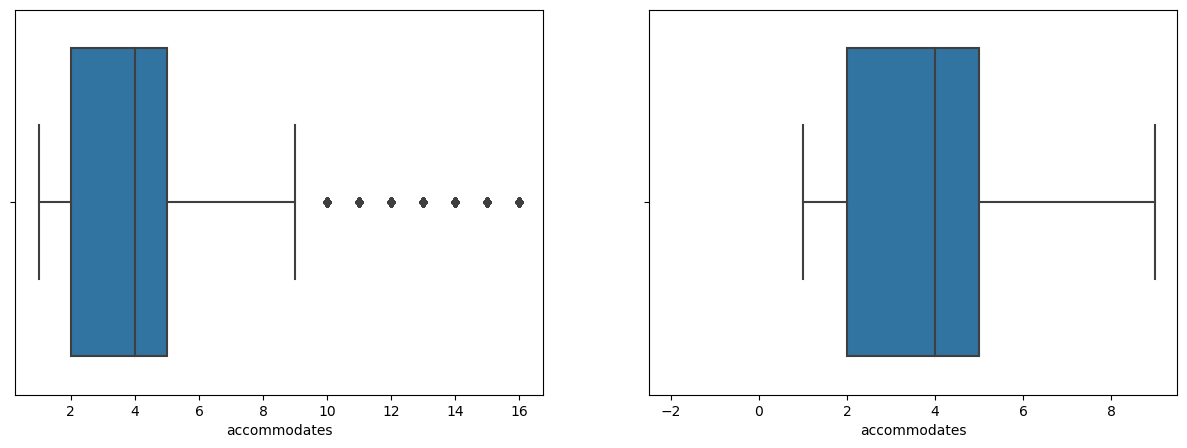

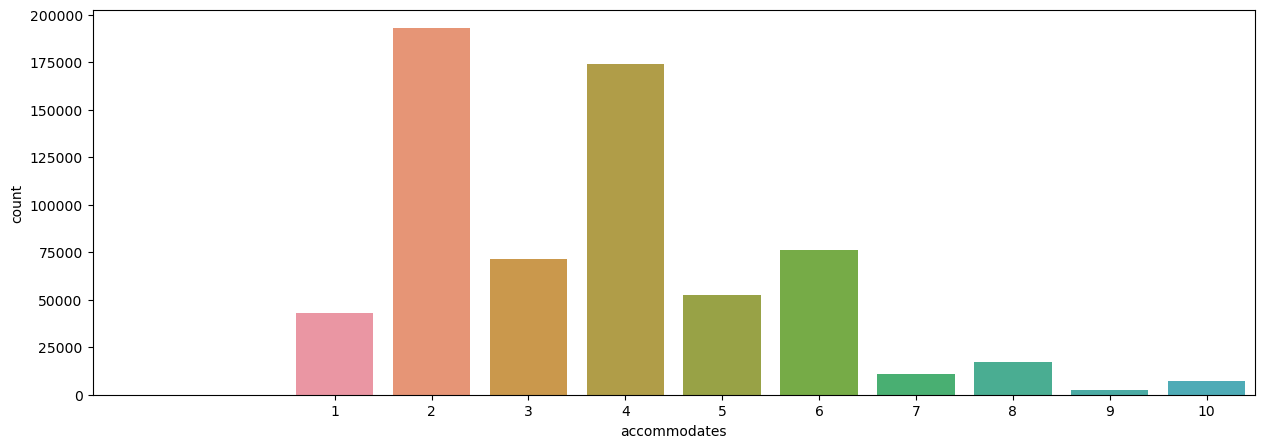

In [27]:
box_plot(airbnb_base['accommodates'])
bar_plot(airbnb_base['accommodates'])

In [28]:
airbnb_base, removed_lines = exc_outliers(airbnb_base, 'accommodates')

print(removed_lines)
print(airbnb_base.shape)

13146
(640364, 23)


<Axes: xlabel='bathrooms', ylabel='count'>

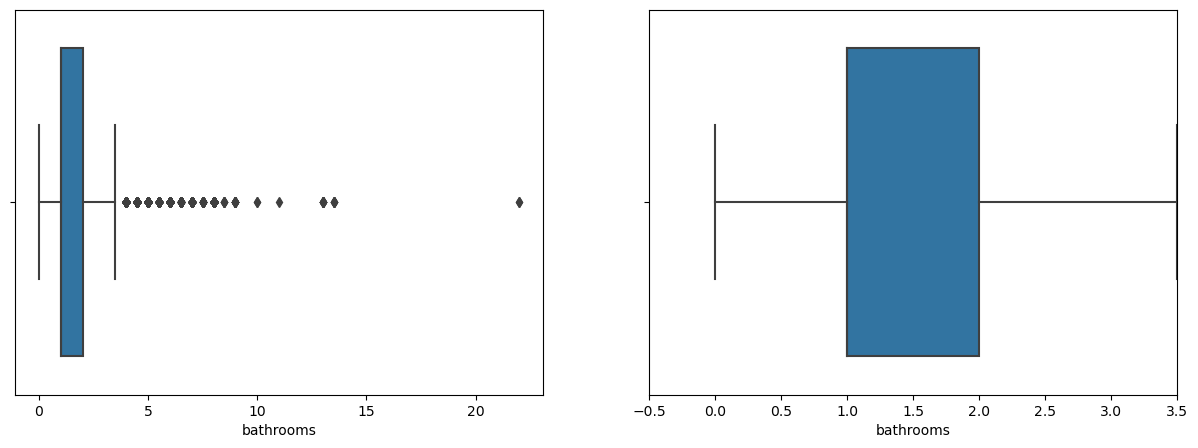

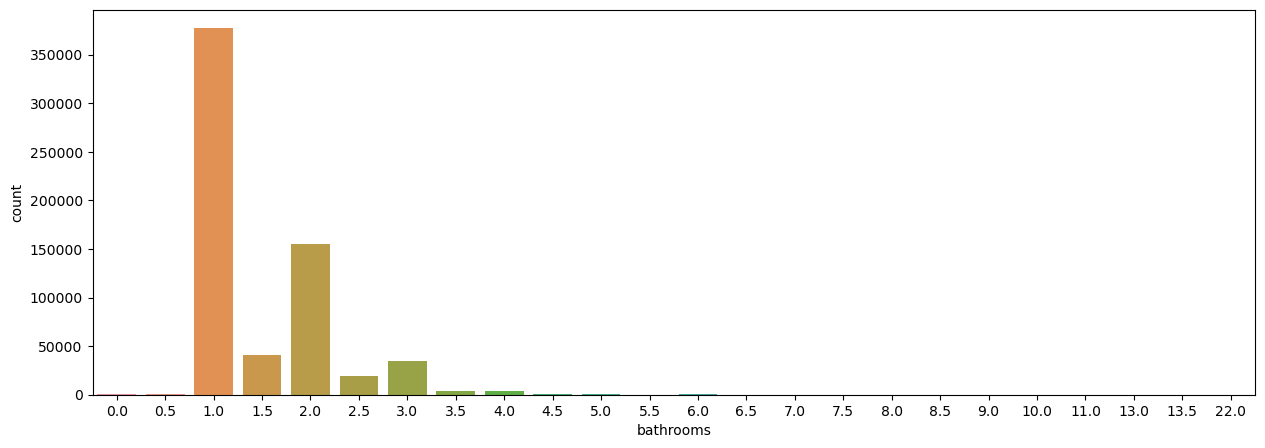

In [29]:
box_plot(airbnb_base['bathrooms'])
plt.figure(figsize=(15, 5))
sns.barplot(x= airbnb_base['bathrooms'].value_counts().index,y=airbnb_base['bathrooms'].value_counts())

In [30]:
airbnb_base, removed_lines = exc_outliers(airbnb_base, 'bathrooms')

print(removed_lines)
print(airbnb_base.shape)

6894
(633470, 23)


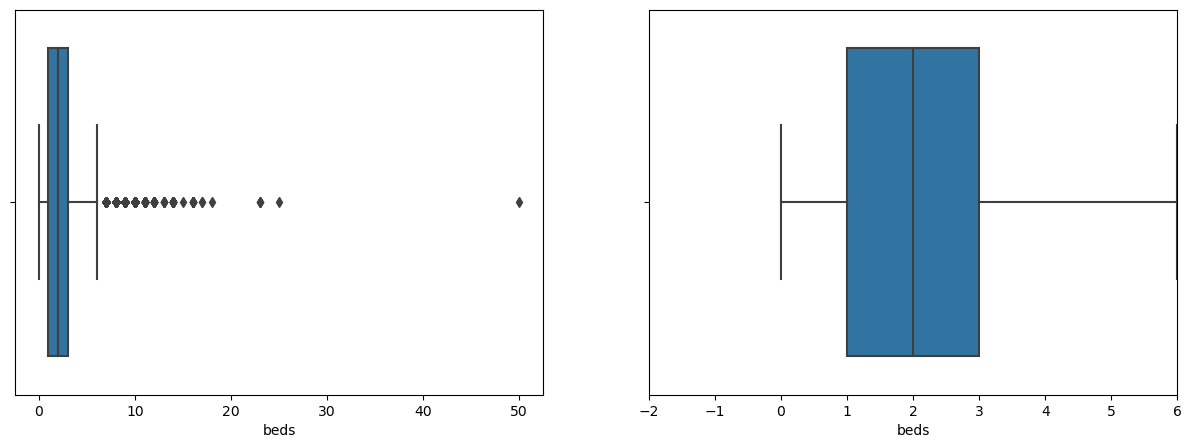

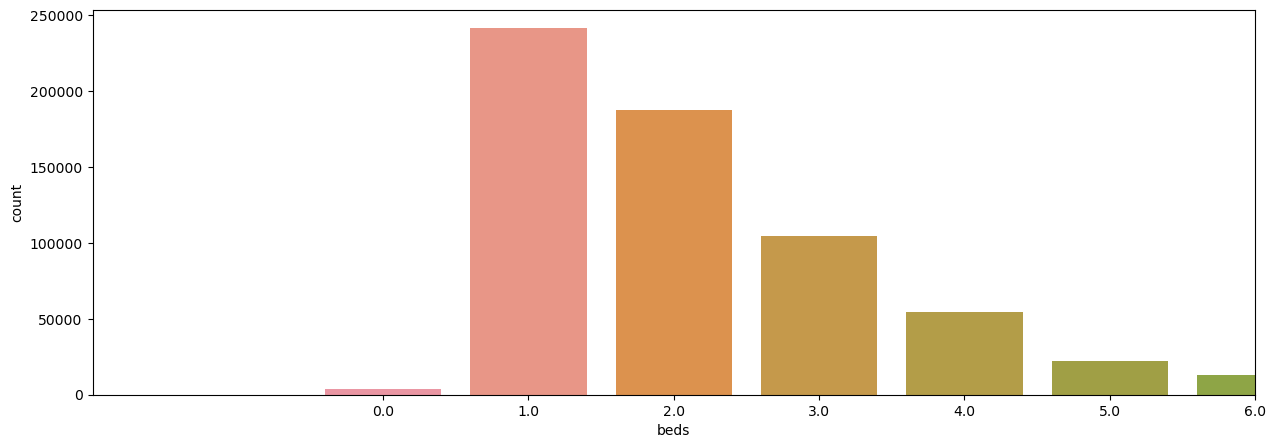

In [31]:
box_plot(airbnb_base['beds'])
bar_plot(airbnb_base['beds'])

In [32]:
airbnb_base, removed_lines = exc_outliers(airbnb_base, 'beds')

print(removed_lines)
print(airbnb_base.shape)

6460
(627010, 23)


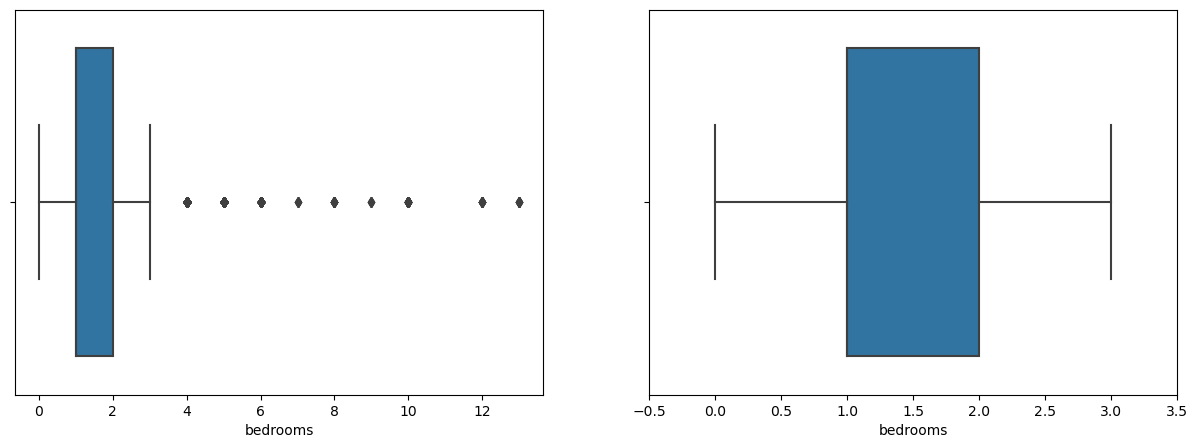

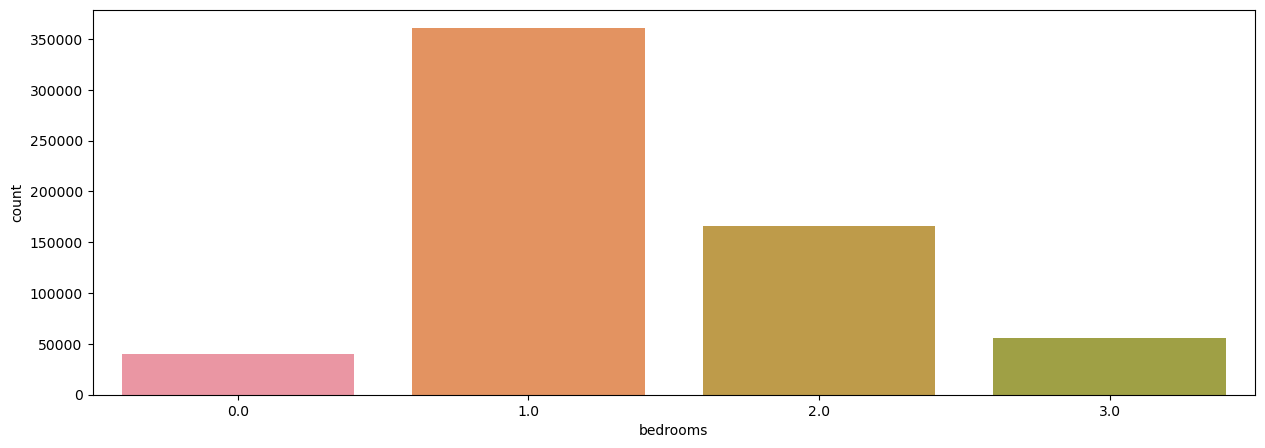

In [33]:
box_plot(airbnb_base['bedrooms'])
bar_plot(airbnb_base['bedrooms'])

In [34]:
airbnb_base, removed_lines = exc_outliers(airbnb_base, 'bedrooms')

print(removed_lines)
print(airbnb_base.shape)

4644
(622366, 23)


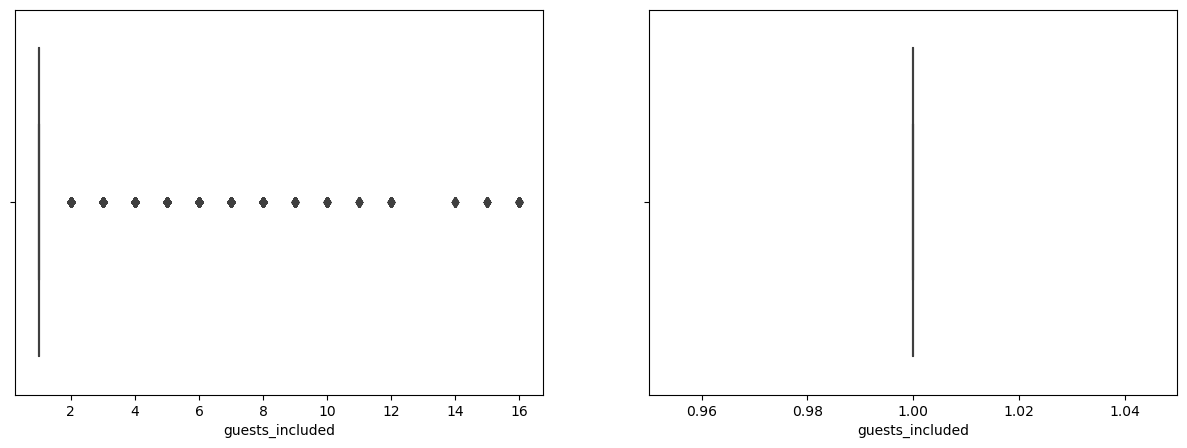

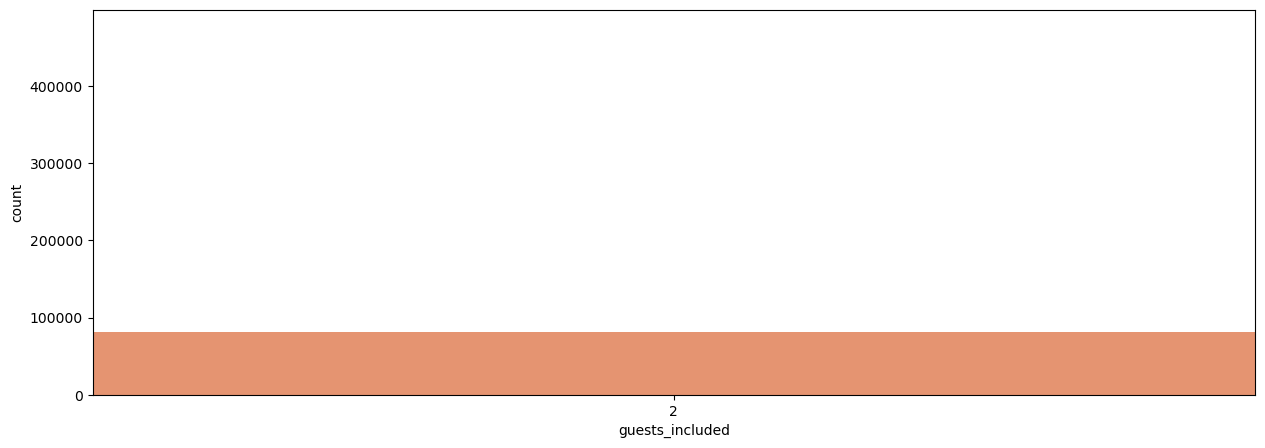

In [35]:
box_plot(airbnb_base['guests_included'])
bar_plot(airbnb_base['guests_included'])

<Axes: xlabel='guests_included', ylabel='count'>

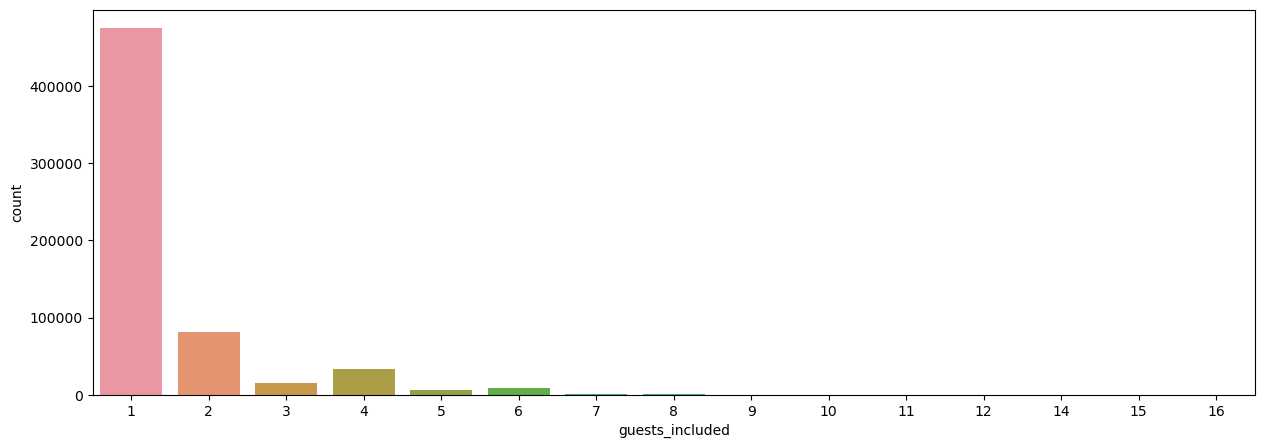

In [36]:

plt.figure(figsize=(15, 5))
sns.barplot(x= airbnb_base['guests_included'].value_counts().index,y=airbnb_base['guests_included'].value_counts())

In [37]:
airbnb_base = airbnb_base.drop('guests_included', axis=1)
airbnb_base.shape

(622366, 22)

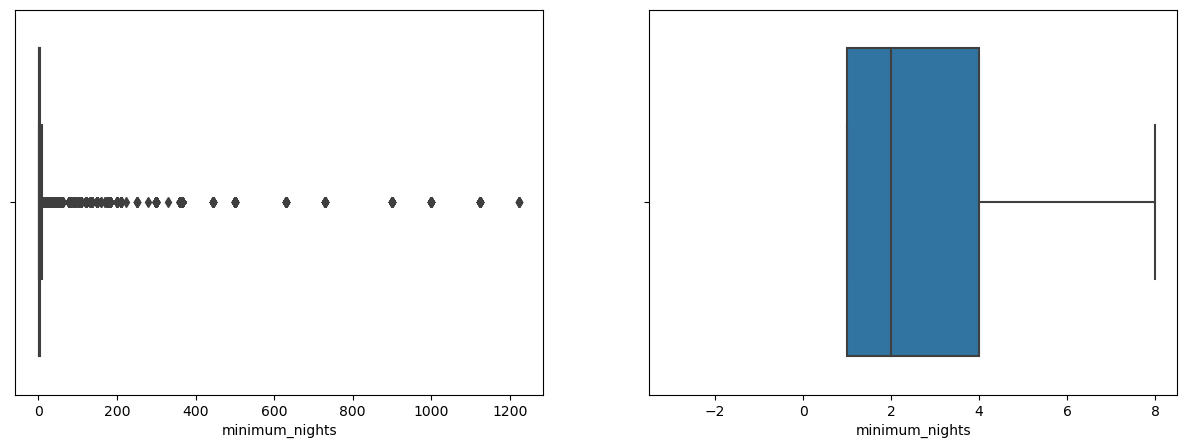

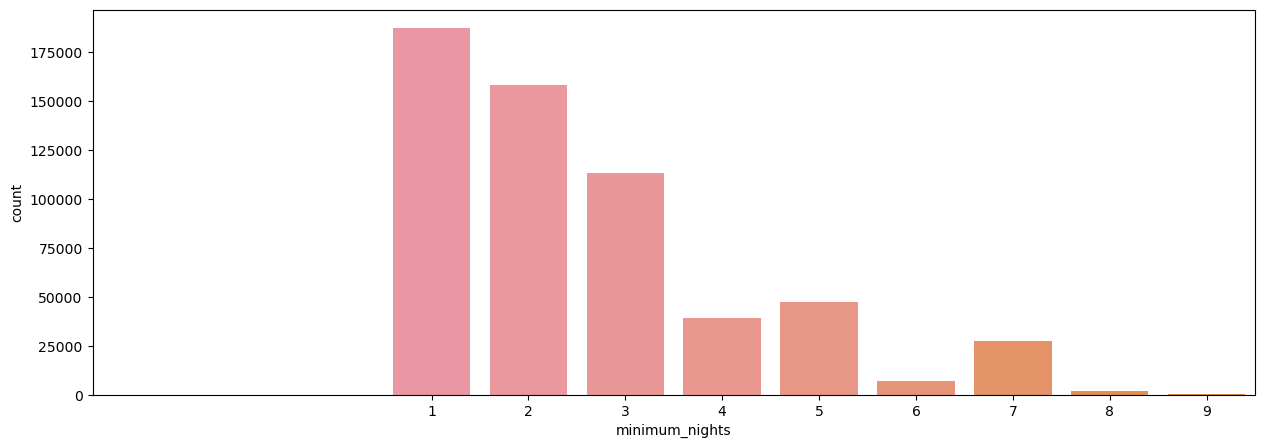

In [38]:
box_plot(airbnb_base['minimum_nights'])
bar_plot(airbnb_base['minimum_nights'])

In [39]:
airbnb_base, removed_lines = exc_outliers(airbnb_base, 'minimum_nights')

print(removed_lines)
print(airbnb_base.shape)

40383
(581983, 22)


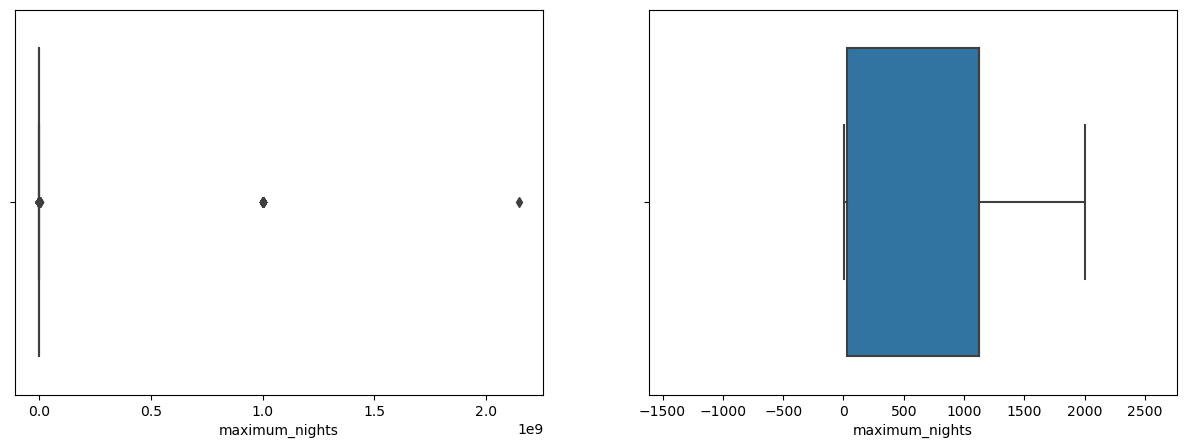

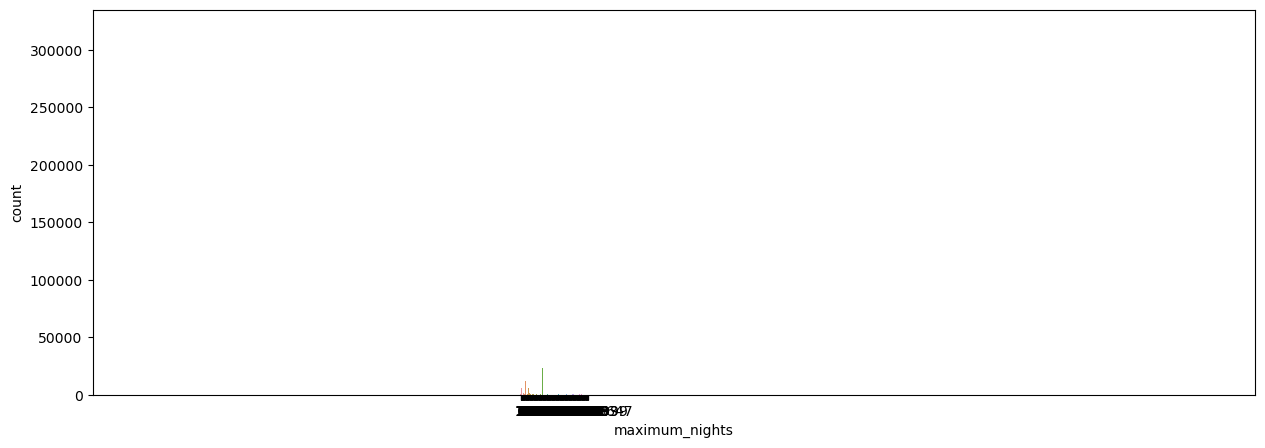

In [40]:
box_plot(airbnb_base['maximum_nights'])
bar_plot(airbnb_base['maximum_nights'])

In [41]:
airbnb_base = airbnb_base.drop('maximum_nights', axis=1)
airbnb_base.shape

(581983, 21)

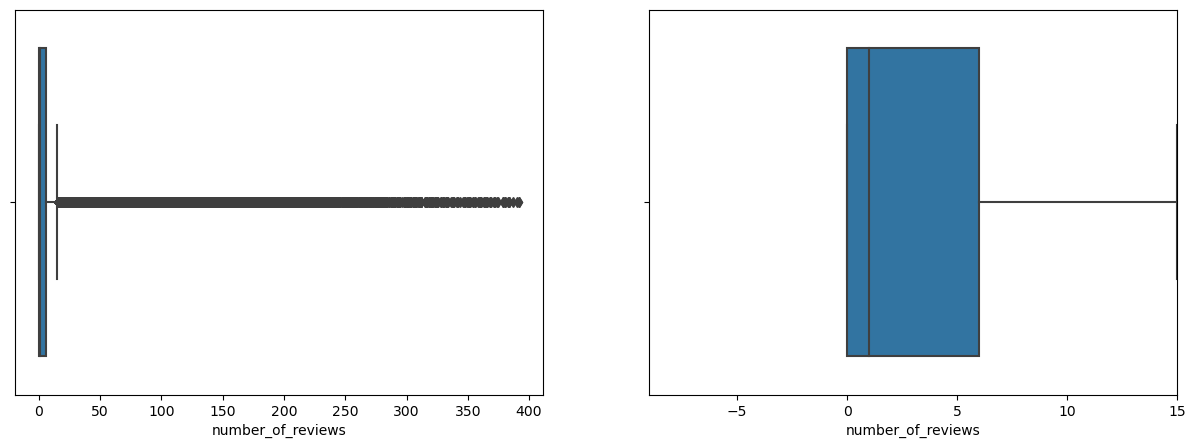

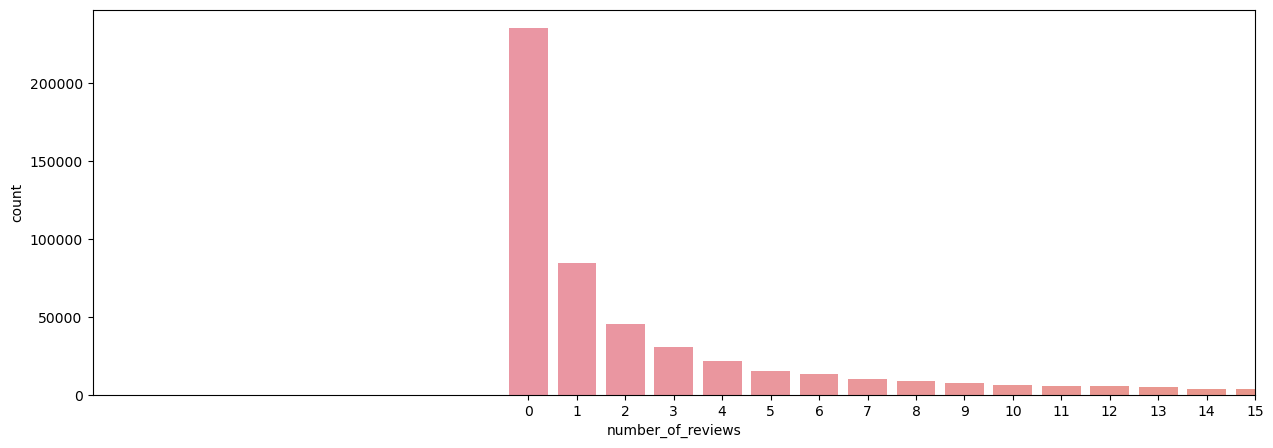

In [42]:
box_plot(airbnb_base['number_of_reviews'])
bar_plot(airbnb_base['number_of_reviews'])

In [43]:
airbnb_base = airbnb_base.drop('number_of_reviews', axis=1)
airbnb_base.shape

(581983, 20)

property_type

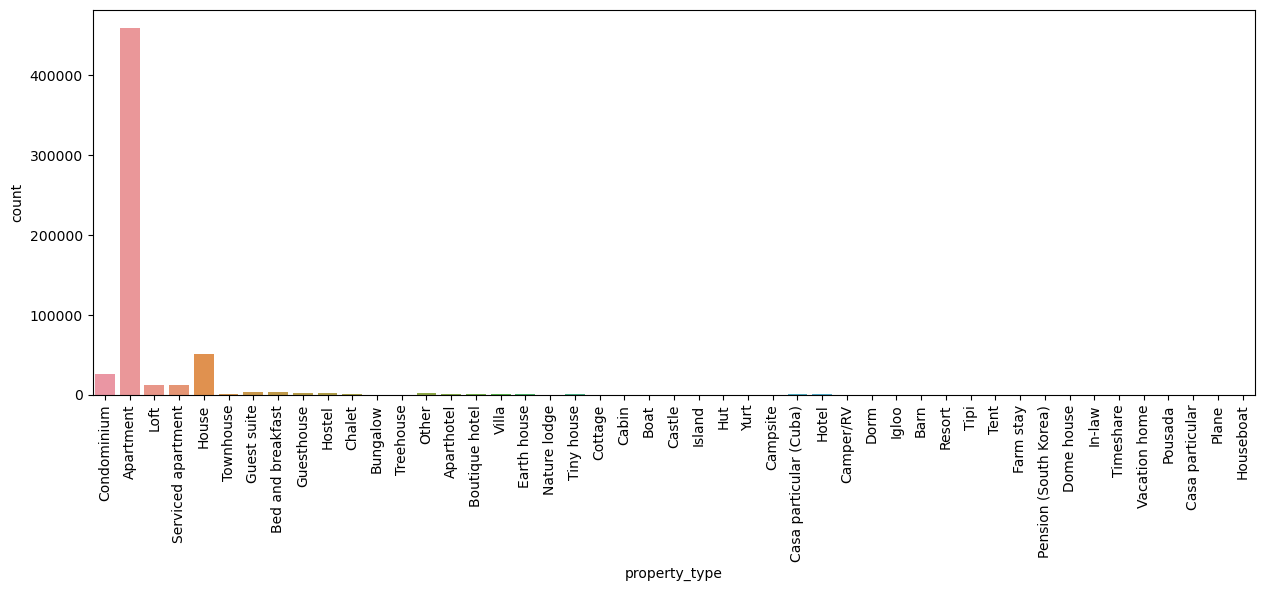

In [45]:
plt.figure(figsize=(15, 5))
graf = sns.countplot(x=airbnb_base['property_type'], data = airbnb_base)
graf.tick_params(axis='x', rotation=90)

In [47]:
table = airbnb_base['property_type'].value_counts()
collumn = []

for t in table.index:
    if table[t] < 2000:
        collumn.append(t)

for t in collumn:
    airbnb_base.loc[ airbnb_base['property_type']==t, 'property_type'] = 'Other'

airbnb_base['property_type'].value_counts()

property_type
Apartment             458354
House                  51387
Condominium            26456
Serviced apartment     12671
Loft                   12352
Other                   8850
Guest suite             3621
Bed and breakfast       3472
Hostel                  2665
Guesthouse              2155
Name: count, dtype: int64

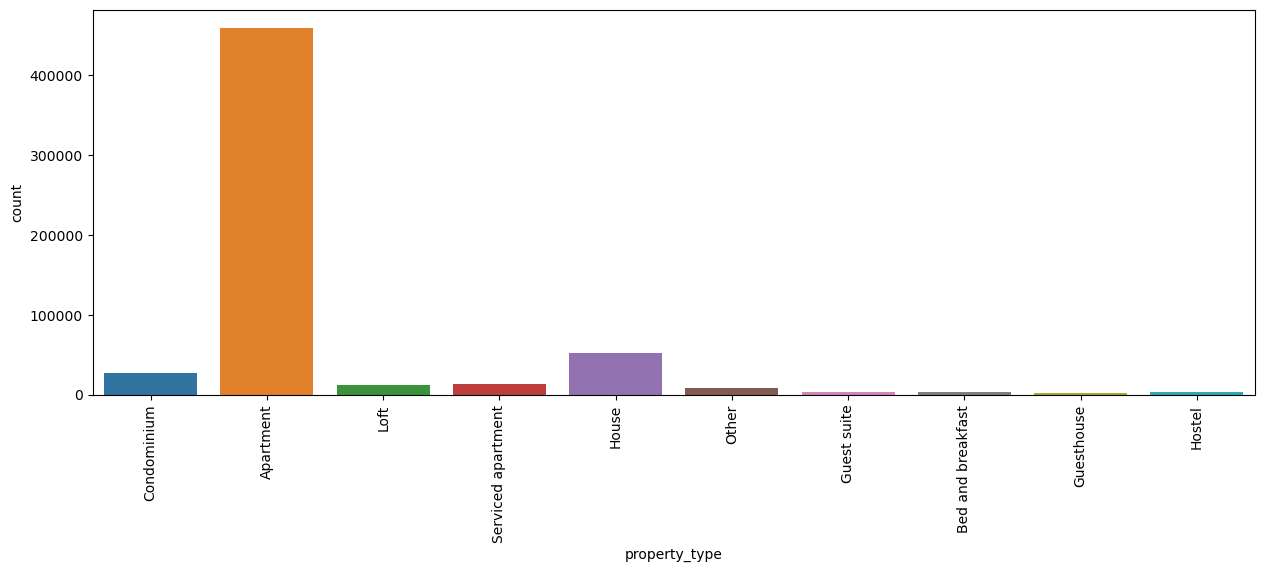

In [48]:
plt.figure(figsize=(15, 5))
graf = sns.countplot(x=airbnb_base['property_type'], data = airbnb_base)
graf.tick_params(axis='x', rotation=90)